In [2]:
%%html
<script>
(function() {
  // Create the toggle button
  const rtlButton = document.createElement("button");
  rtlButton.textContent = "Toggle LTR";
  rtlButton.id = "top-rtl-toggle";
  rtlButton.style.marginLeft = "8px";
  rtlButton.style.padding = "4px 10px";
  rtlButton.style.fontSize = "14px";
  rtlButton.style.cursor = "pointer";

  // State
  var rtlActive = false;

  // Styling function
  var applyStyleToEditor = (editor) => {
    if (!editor) return;
    var direction = getComputedStyle(editor).getPropertyValue('direction')=='rtl' ? 'ltr' : 'rtl';
    var text_align = getComputedStyle(editor).getPropertyValue('text-align')=='right' ? 'left' : 'right';
    editor.style.setProperty('direction', direction, 'important');
    editor.style.setProperty('text-align', text_align, 'important');
  };

  // Toggle logic
  rtlButton.onclick = () => {
    rtlActive = !rtlActive;
    rtlButton.textContent = rtlActive ? "Toggle LTR" : "Toggle RTL";
    document.querySelectorAll('.jp-MarkdownCell .jp-InputArea-editor').forEach(applyStyleToEditor);
    document.querySelectorAll('.jp-RenderedHTMLCommon code, .jp-RenderedHTMLCommon code span').forEach(applyStyleToEditor);
    document.querySelectorAll('jp-RenderedHTMLCommon, .jp-RenderedHTMLCommon *').forEach(applyStyleToEditor);
  };

  // Watch for focus into editing Markdown cells
  // document.addEventListener('focusin', (event) => {
  //   const editor = event.target.closest('.jp-MarkdownCell .jp-InputArea-editor');
  //    if (editor) applyStyleToEditor(editor);
  // });

  // Insert into top toolbar if not already present
  var insertIntoToolbar = () => {
    const toolbar = document.querySelector('.jp-NotebookPanel-toolbar');
    if (toolbar && !document.getElementById("top-rtl-toggle")) {
      toolbar.appendChild(rtlButton);
    } else {
      // Try again in a moment if toolbar isn't ready yet
      setTimeout(insertIntoToolbar, 300);
    }
  };

  insertIntoToolbar();
})();
</script>

In [5]:
%%html
<!-- <style>
  table {display: inline-block}
</style> -->


# מבוא, משתנים, טיפוסים, אופרטורים, תנאים

# הקדמה

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/jCJC-SCcZYE?si=xgKTHYAVK0zG1Ecu" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### מטרות הקורס

- לפתח מיומנויות בסיסיות של **תכנות** ו**חשיבה אלגוריתמית**
    - לא עוסק בפעולת החומרה של המחשב

### תוכנית הלימודים:
- יסודות התכנות ב-Python  
- רקורסיה  
- תכנות מונחה עצמים  
- חישובים מדעיים (Numpy)  
- עיבוד תמונה (Numpy)  
- ניתוח נתונים (Pandas)  
- הצגת נתונים (Pandas)

### בקליפת אגוז
- אין צורך בידע מוקדם
- עם זאת, הקצב מהיר
- הדרך היחידה להישאר בעניינים היא **תרגול**

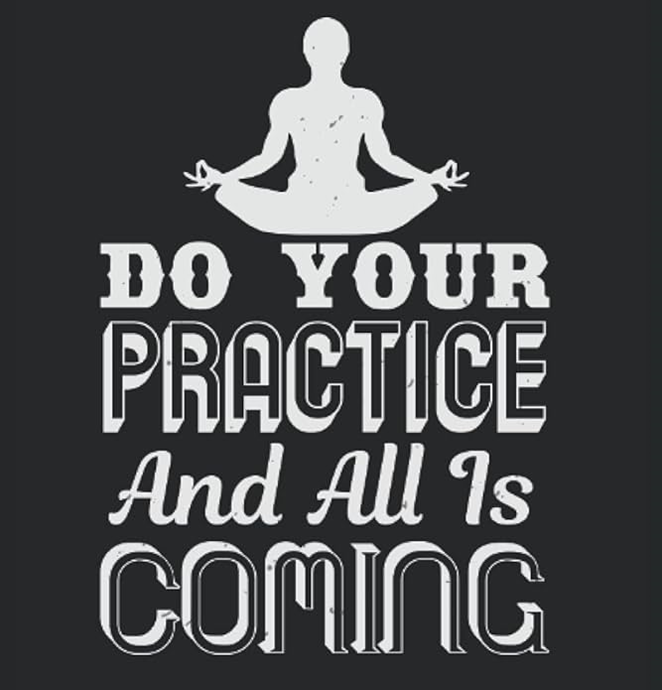

# מנהלה

#### אתר הקורס: [http://courses.cs.tau.ac.il/pyProg/2425b/](http://courses.cs.tau.ac.il/pyProg/2425b/)
- ניהול הקורס
- לוח זמנים  
- מצגות  
- מחברות Jupyter  
- מדריכי התקנה  
- מקורות חיצוניים  
- שיעורי בית  

#### מודל: [https://moodle.tau.ac.il/course/view.php?id=50918202098](https://moodle.tau.ac.il/course/view.php?id=50918202098)
- הגשת שיעורי בית  
- פורומים (כללי ולמטלות)  

#### קיים גם מודל נפרד לכל תרגול (הודעות של עוזרי הוראה וכו')


### תרגול
- מפגשים מעשיים  
- בכיתת מחשבים סטנדרטית  
- מטרות:
    - מחברות Jupyter  
        - תרגול הנושאים שנלמדו בהרצאה  
        - התנסות מעשית בכלים כמו PyCharm  
    - רקע לקראת פתרון המטלות

### שיעורי בית
- הנחיות תחת לשונית "תרגילים" באתר הקורס  
- הרבה **התנסות מעשית**
- **אין דרך אחרת ללמוד תכנות!**

#### איפה אפשר לעבוד?
- מעבדות מחשבים  
- שעות וכתובות מופיעות באתר הקורס  
    - **לגבות עם אימייל / דיסק און קי / Dropbox וכו'!**

### הנחיות הגשה
- הגשה **בודדת בלבד!**
- 7 תרגילים  
- חובה להגיש לפחות 6  
- ממוצע של 6 הטובים ביותר מהווה 25% מהציון הסופי  
- 10 ימי חסד

### מעבדה מונחית
- מפגש מעשי אופציונלי במעבדת מחשבים  
- תמיכה טכנית (PyCharm, מחברות Jupyter וכו')  
- **מומלץ להשתמש!**

### הבחינה
- הציון הסופי מורכב מהממוצע של המטלות וציוני הבחינה
- חובה לעבור את הבחינה כדי לעבור את הקורס  
- בחינה בכתב  
- כוללת את כל חומר הקורס:
    - הרצאות, תרגולים ושיעורי בית

### הנושאים להיום
- רקע קצר על תכנות  
- יסודות Python:
    - משתנים (`int`, `float`, `string`, `boolean`)  
    - אופרטורים (חשבון, השוואה, לוגיים)


# רקע

In [3]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/7TWw9rOsaXg?si=g_cFn945WIOZF6pb" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### יסודות שפות תכנות

- תוכנית מחשב היא רצף של הוראות טקסט שניתן "להבין" על ידי מחשב ולהריץ.

- שפת תכנות היא שפה מלאכותית, קריאה למכונה, שנועדה לבטא חישובים שניתן לבצע במחשב.

- בויקיפדיה מופיעות מעל 500 שפות תכנות שונות.





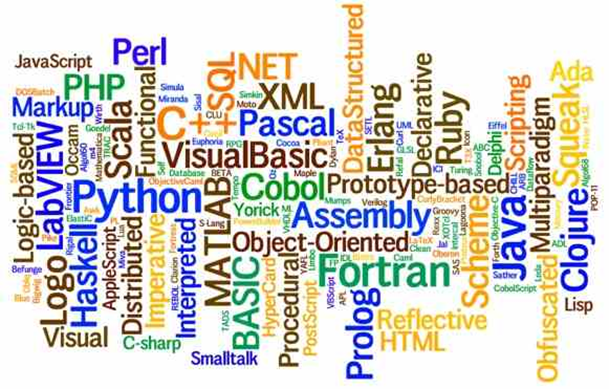

###  קוד מכונה (שפת מכונה)

- המחשב מבין אך ורק שפת מכונה, המורכבת מרצפים של אפסים ואחדות.
- צפו כעת סרטון על מנת להבין כיצד מספרים מיוצגים בשפת מכונה 

In [4]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/WYkkkM6vCx0?si=NstLcocgJ9vKoLtR" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>


### משפת מכונה לשפת תכנות (ולהיפך)
- מעבר לייצוג מספרים, ניתן לייצג במחשב גם פקודות באמצעות שפות מכונה.
- שפות המכונה מאוד לא נוח לעבודה ולא אינטואיטיבית לבני אדם, ולכן פותחו שפות תכנות שונות כמו Python, Java ו-C על מנת לגשר על פער זה.  
- בני האדם כותבים בשפת תכנות. על מנת לבצע פקודות אלו (או "להריץ את התכנית"), מחשב תחילה "מתרגם" את שפת התכנות לשפת מכונה.  
- בקורס הזה, לא נעסוק באיך המחשב מבצע את התרגום הזה.

### תוכנית מחשב

- רצף של הוראות שנועד להשיג מטרה מסוימת.  
- ההוראות מתבצעות לפי סדר. אף הוראה לא מתבצעת לפני שההוראה הקודמת הושלמה.


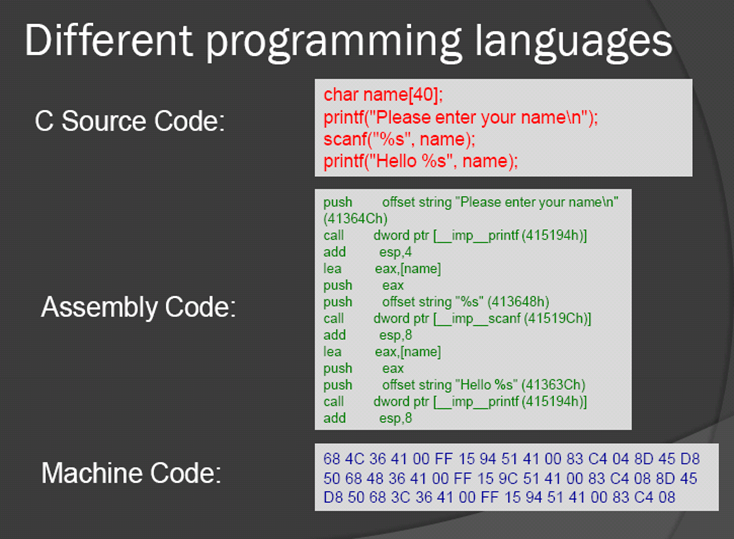



In [1]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/PbvcUBaoHjg?si=XqBXBgLLDaeicHEw" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

### Python
- מאז 1991  
- קל ללמידה  
- זמן פיתוח קצר  
- מהיר מספיק לרוב היישומים  
- קהילה עצומה  
- בשימוש נרחב בתעשייה  
- Machine Learning  

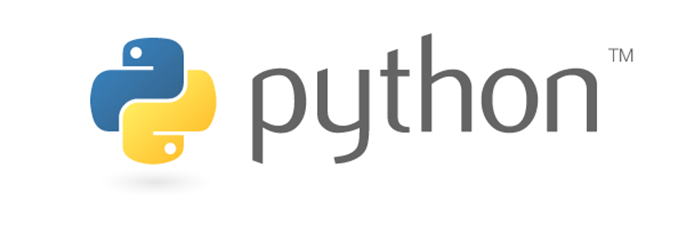

### התקנה והרצה של Python  
- התקינו את Anaconda [דרך הקישור הזה](https://www.anaconda.com/docs/getting-started/anaconda/install)
- התקינו את PyCharm **Community Edition**. ניתן להעזר [במדריך הזה](https://courses.cs.tau.ac.il/pyProg/2324b/resources/pycharm%20tutorial.pdf)  
    - השתמשו אך ורק ב-**Python 3.11.x**   

In [6]:
import json
from jupyterquiz import display_quiz
example = \
'''
   [{
    
        "question": "איזה פייתון צריך להתקין?",
        "type": "many_choice",
        "answers": [
            {
                "answer": "3.11",
                "correct": true,
                "feedback": "יאססס"
            },
            {
                "answer": "3.9",
                "correct": false,
                "feedback": "נופ"
            },
            {
                "answer": "3.12",
                "correct": false,
                "feedback": "נופ"
            },
            {
                "answer": "3.6",
                "correct": false,
                "feedback": "נופ"
            }
        ]
    }]
'''
myquiz = json.loads(example)
display_quiz(myquiz)

<IPython.core.display.Javascript object>

לפניכם תוכנית קצרה בפייתון. לחצו על כפתור ההרצה (Run) וצפו בפלט של התוכנית בחלק התחתון של החלונית.

בעולם מדעי המחשב ישנה מוסכמה מקובלת שהתוכנית הראשונה שכותבים כאשר לומדים שפת תכנות חדשה היא תוכנית שמדפיסה למסך את המילים "Hello World!"

In [7]:
print("Hello World!")

Hello World!


## הקדמה לפייתון

In [3]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/i9KoiRG9qRE?si=_WnXRCMNISFVosP5" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>

In [2]:
%%html
<iframe width="560" height="315" src="https://www.youtube.com/embed/-aW962IwwkQ?si=HnYD_AweMgFw8ePm" title="YouTube video player" frameborder="0" allow="accelerometer; autoplay; clipboard-write; encrypted-media; gyroscope; picture-in-picture; web-share" referrerpolicy="strict-origin-when-cross-origin" allowfullscreen></iframe>